In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import display

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class label']
display(df.head())

X = df[['Petal length', 'Petal width']].values
y = pd.factorize(df['Class label'])[0]

# discard exmaples in the first class
X = X[50:150]
y = np.where(y[50:150] == 2, -1, y[50:150])

,Sepal length,Sepal width,Petal length,Petal width,Class label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### **Assignment**
Implement the Adaline with SGD which can set different batch_size (M) as parameter.Then, use the Iris dataset to fit your model with 3 different M (including M=1) and fixed learning rate η and print out the accuracy of each model. Last, plot the cost against the number of epochs using different M in one figure.

Note:

Submit to iLMS with your code file (Lab04-1_{student_id}.ipynb) and image file (Lab04-1_student_id.png)
You can take the model we taught in lab as reference.
To simplfy your work, you can ignore part of data which is not divisible by M.
Your code file should contain:

Split training and testing data (test_size = 20% of the whole dataset)
Handcrafted Adaline classifier with M as parameter.
Fit model with 3 different M and fixed η. (including M=1)
Print the accuracy of each model.
Plot the cost against the number of epochs using different M in one figure.

Your image file should contain:

Figure of the cost against the number of epochs using different M.

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [0]:
from numpy.random import seed

class AdalineSGD(object):
  
  def __init__(self, eta=0.01, n_iter=50, shuffle=True, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.w_initialized = False
    self.shuffle = shuffle
    if random_state:
        seed(random_state)
        
        
  def fit(self, X, y, M):

    self._initialize_weights(X.shape[1])
    self.cost_ = []
    for i in range(self.n_iter):
        if self.shuffle:
            X, y = self._shuffle(X, y)
        cost = []
        # X shape (80,2)
        # y shape (80,)
        
        for i in range(1,X.shape[0]//M+1):
          cost.append(self._update_weights(X[(i-1)*M:i*M],y[(i-1)*M:i*M],M))
          
        avg_cost = sum(cost) / (len(y)//M)
        self.cost_.append(avg_cost)

        
    return self

  def _shuffle(self, X, y):
      """Shuffle training data"""
      r = np.random.permutation(len(y))
      return X[r], y[r]

  def _initialize_weights(self, m):
      """Randomly initialize weights"""
      self.w_ = np.random.normal(loc=0.0, scale=0.01, size=1 + m)
      self.w_initialized = True

  def _update_weights(self, xi, target,M):
      """Apply Adaline learning rule to update the weights"""
      
      output = self.activation(xi)
      error = (target - output)
      print("xi.shape:", xi.shape)
      print("error.shape: ", error.shape)
      
      
      self.w_[1:] += self.eta * xi.T.dot(error)
      self.w_[0] += self.eta * error.sum()
      cost = 0.5 * (error**2).sum()/M

      return cost

  def net_input(self, X):
      """Calculate net input"""

      return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self, X):
      """Compute linear activation"""
      return self.net_input(X)

  def predict(self, X):
      """Return class label after unit step"""
      return np.where(self.activation(X) >= 0.0, 1, -1)

xi.shape: (1, 2)
error.shape:  (1,)
xi.shape: (1, 2)
error.shape:  (1,)
xi.shape: (1, 2)
error.shape:  (1,)
xi.shape: (1, 2)
error.shape:  (1,)
xi.shape: (1, 2)
error.shape:  (1,)
xi.shape: (1, 2)
error.shape:  (1,)
xi.shape: (1, 2)
error.shape:  (1,)
xi.shape: (1, 2)
error.shape:  (1,)
xi.shape: (1, 2)
error.shape:  (1,)
xi.shape: (1, 2)
error.shape:  (1,)
xi.shape: (1, 2)
error.shape:  (1,)
xi.shape: (1, 2)
error.shape:  (1,)
xi.shape: (1, 2)
error.shape:  (1,)
xi.shape: (1, 2)
error.shape:  (1,)
xi.shape: (1, 2)
error.shape:  (1,)
xi.shape: (1, 2)
error.shape:  (1,)
xi.shape: (1, 2)
error.shape:  (1,)
xi.shape: (1, 2)
error.shape:  (1,)
xi.shape: (1, 2)
error.shape:  (1,)
xi.shape: (1, 2)
error.shape:  (1,)
xi.shape: (1, 2)
error.shape:  (1,)
xi.shape: (1, 2)
error.shape:  (1,)
xi.shape: (1, 2)
error.shape:  (1,)
xi.shape: (1, 2)
error.shape:  (1,)
xi.shape: (1, 2)
error.shape:  (1,)
xi.shape: (1, 2)
error.shape:  (1,)
xi.shape: (1, 2)
error.shape:  (1,)
xi.shape: (1, 2)
error.shape

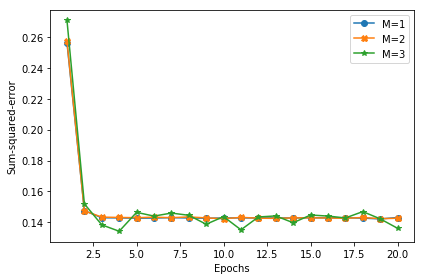

Misclassified samples: 1
Accuracy: 0.95


In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

adas = AdalineSGD(n_iter=20, eta=0.01, random_state=1)
adas2 = AdalineSGD(n_iter=20, eta=0.01, random_state=1)
adas3 = AdalineSGD(n_iter=20, eta=0.01, random_state=1)
adas.fit(X_train_std, y_train,1)
adas2.fit(X_train_std, y_train,2)
adas3.fit(X_train_std, y_train,3)

# cost values
plt.plot(range(1, len(adas.cost_) + 1), adas.cost_, marker='o',label='M=1')
plt.plot(range(1, len(adas2.cost_) + 1), adas2.cost_, marker='X',label='M=2')
plt.plot(range(1, len(adas3.cost_) + 1), adas3.cost_, marker='*',label='M=3')

plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# testing accuracy

y_pred = adas.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))